# [CM1] Data Pre-processing and Preparation

Importing all necessary libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [21]:
df = pd.read_csv('dkmacovid_train.csv')

### As the columns 'Resident Population 2020 Census' and 'Population Density 2020 Census' have commas in the data , we will be removing it for computation purposes. 

In [23]:
df['Resident Population 2020 Census'] = df['Resident Population 2020 Census'].str.replace(',','').astype(np.int64)
df['Population Density 2020 Census'] = df['Population Density 2020 Census'].str.replace(',','').astype(float)

In [24]:
df.dtypes

Day                                  int64
State ID                             int64
State                               object
Lat                                float64
Long_                              float64
Active                               int64
Incident_Rate                      float64
Total_Test_Results                   int64
Case_Fatality_Ratio                float64
Testing_Rate                       float64
Resident Population 2020 Census      int64
Population Density 2020 Census     float64
Density Rank 2020 Census             int64
SexRatio                             int64
Confirmed                             bool
Deaths                                bool
Recovered                             bool
dtype: object

## Checking Outliers and Removing them

<AxesSubplot:xlabel='Case_Fatality_Ratio'>

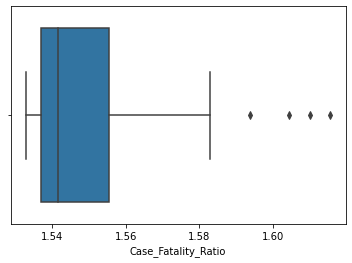

In [25]:
#sample box plot to display outliers
df_gstate = df.groupby('State')
z = df_gstate.get_group('Florida')['Case_Fatality_Ratio']
sns.boxplot(x = z)

In [26]:
#The outliers are checked and removed by replacing the outliers boundry values by grouping the dataset according to the State
for key,value in df_gstate:
    groups = df_gstate.get_group(key)
    temp = groups.iloc[:,5:10]
    for columns in temp:
        Q1 = np.percentile(temp[columns],25)
        Q3 = np.percentile(temp[columns],75)
        IQR = Q3 - Q1
        right_limit = Q3 + 1.5*IQR
        left_limit = Q1 - 1.5*IQR
        outlier_right_index = groups[groups[columns] > right_limit][columns].index
        
        outlier_left_index = groups[groups[columns] < left_limit][columns].index
        n_outliers = len(outlier_right_index) + len(outlier_left_index)
        if(n_outliers > 0):
            print(key,columns,n_outliers)
            df.loc[outlier_right_index,columns] = right_limit
            df.loc[outlier_left_index,columns] = left_limit

Florida Case_Fatality_Ratio 4
Hawaii Case_Fatality_Ratio 6
Indiana Case_Fatality_Ratio 1
Maine Case_Fatality_Ratio 1
Mississippi Case_Fatality_Ratio 1
Montana Active 3
Montana Case_Fatality_Ratio 3
Nebraska Active 1
Nebraska Case_Fatality_Ratio 1
Ohio Active 2
Utah Active 3


<AxesSubplot:xlabel='Case_Fatality_Ratio'>

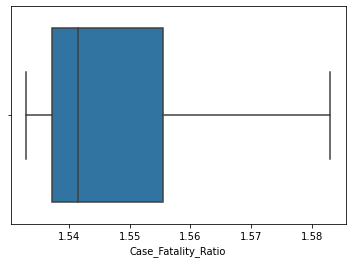

In [27]:
z = df_gstate.get_group('Florida')['Case_Fatality_Ratio']
sns.boxplot(x = z)

## Normalization

In [28]:
normalization = df[['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio',
            'Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census',
            'Density Rank 2020 Census','SexRatio']]

In [29]:
# Z-score normalization
normalization = (normalization - normalization.mean()) / normalization.std()

In [31]:
df[['Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio',
            'Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census',
            'Density Rank 2020 Census','SexRatio']] = normalization


,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,-1.178243,0.304476,-0.200641,0.143976,-0.483393,-0.475230,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,2,2,Alaska,3.607611,-3.031933,-0.448967,-0.290209,-0.569371,-1.797949,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,2,3,Arizona,-0.945708,-0.944926,0.389043,0.088511,-0.007491,0.075713,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,2,4,Arkansas,-0.741458,0.025816,-0.482359,0.202178,-0.456457,-0.029941,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,2,5,California,-0.552594,-1.365168,4.275448,-0.502417,4.022089,-0.791062,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,31,46,Vermont,0.753675,1.027338,-0.524025,-2.293117,-0.625582,-0.268880,1.273810,-0.767341,-0.234953,0.378854,-0.236352,True,True,True
1376,31,47,Virginia,-0.280277,0.749264,0.400787,-0.559356,-0.005284,-0.533271,-0.745045,0.397324,-0.144153,-0.726607,-0.236352,True,True,True
1377,31,49,West Virginia,-0.161357,0.607433,-0.488091,-0.195859,-0.475653,0.063695,0.411132,-0.599582,-0.232024,0.248799,0.074282,True,True,True
1378,31,50,Wisconsin,0.790345,0.166226,-0.391751,1.287093,0.129655,-0.828583,0.350879,-0.001818,-0.211155,-0.011309,0.384916,True,True,True


In [32]:
df.to_csv("cleaned_normalized_coviddata.csv",index = False)

## Representation methods


In [33]:
# Performinh PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 11)

In [34]:
pca_features = pca.fit_transform(normalization)
pca_features.shape

(1380, 11)

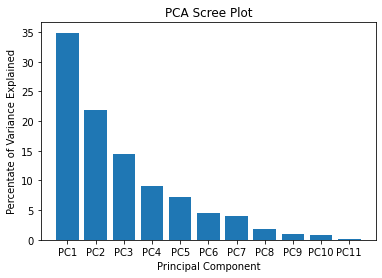

In [35]:
#Plotting the Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [36]:
# exporting the pca_feartures array so that it can be used in the other notebooks
%store pca_features

Stored 'pca_features' (ndarray)


## Summary

#### Since the dataset is same as the previous assignment, operations like checking for irrelevent negative values, NAN's have been skipped and only necessary operations have been performed. These operations are as follows:<br><br> The 'Resident Population 2020 Census' and 'Population Density 2020 Census' were of type string due to presence of commas between the digits. These commas have been removed and their their datatype have been changed to int and float ( in accordance with the type of data ).<br><br>The dataset is grouped according to the states, to find the outliers in each column. The following formula was used for outlier calculation: outliers = Q1-1.5*IQR or Q3+1.5*IQR. A total of 26 outliers were detected and replaced with their nearest boundry values. A sample box plot has been plotted to show the difference.<br><br>The dataset is normalized using z score normalization. <br><br>Feature extraction is done using PCA analysis to reduce the complexity of the deep learning models. This reduces the weight computations as the number of inputs are significantly reduced
    
    
    
